In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import os
import time

#Getting Data
df = pd.read_csv('/Users/User/Desktop/ML0000/python/2/heart.csv')
print(df.head(5))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [2]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

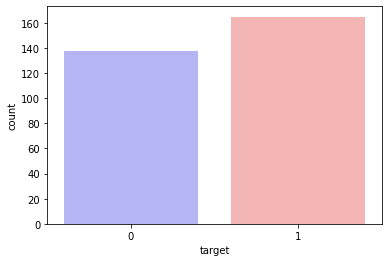

In [3]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

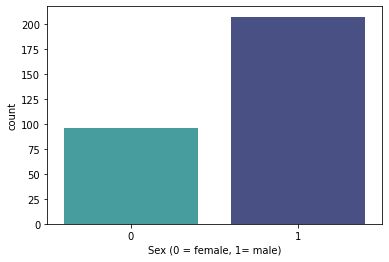

In [4]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%
Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [7]:
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [11]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")


     cp_0  cp_1  cp_2  cp_3
0       0     0     0     1
1       0     0     1     0
2       0     1     0     0
3       0     1     0     0
4       1     0     0     0
..    ...   ...   ...   ...
298     1     0     0     0
299     0     0     0     1
300     1     0     0     0
301     1     0     0     0
302     0     1     0     0

[303 rows x 4 columns]      thal_0  thal_1  thal_2  thal_3
0         0       1       0       0
1         0       0       1       0
2         0       0       1       0
3         0       0       1       0
4         0       0       1       0
..      ...     ...     ...     ...
298       0       0       0       1
299       0       0       0       1
300       0       0       0       1
301       0       0       0       1
302       0       0       1       0

[303 rows x 4 columns]      slope_0  slope_1  slope_2
0          1        0        0
1          1        0        0
2          0        0        1
3          0        0        1
4          0        0        

In [16]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [48]:
from sklearn.cluster import KMeans
from sklearn import preprocessing,svm,neighbors
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


X=df.drop(["target"],1)
y=df["target"]
X=(X-np.min(X))/(np.max(X)-np.min(X))
print(X)

          age  sex  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.708333  1.0  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1    0.166667  1.0  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2    0.250000  0.0  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3    0.562500  1.0  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4    0.583333  0.0  0.245283  0.520548  0.0      0.5  0.702290    1.0   
..        ...  ...       ...       ...  ...      ...       ...    ...   
298  0.583333  0.0  0.433962  0.262557  0.0      0.5  0.396947    1.0   
299  0.333333  1.0  0.150943  0.315068  0.0      0.5  0.465649    0.0   
300  0.812500  1.0  0.471698  0.152968  1.0      0.5  0.534351    0.0   
301  0.583333  1.0  0.339623  0.011416  0.0      0.5  0.335878    1.0   
302  0.583333  0.0  0.339623  0.251142  0.0      0.0  0.786260    0.0   

      oldpeak    ca  ...  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  \
0    0.370968  0.00  ...   0.0   0.0   1.0   

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
lnr=LinearRegression()
lr=LogisticRegression()
knn=neighbors.KNeighborsClassifier(n_neighbors = 2) 
svm0=svm.SVC(random_state = 1)
nb=GaussianNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)


lnr.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm0.fit(X_train,y_train)
nb.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rf.fit(X_train,y_train)

print(lnr.score(X_test,y_test),lr.score(X_test,y_test),knn.score(X_test,y_test),svm0.score(X_test,y_test),nb.score(X_test,y_test))

0.4999617455979657 0.8688524590163934 0.7704918032786885 0.8360655737704918 0.819672131147541


{'LinearRegression': 0.4999617455979657, 'LogisticRegression': 0.8688524590163934, 'Knn': 0.7704918032786885, 'SVM': 0.8360655737704918, 'Naive Bayes': 0.819672131147541, 'Decision Trees': 0.7540983606557377, 'Random Forest': 0.8688524590163934}


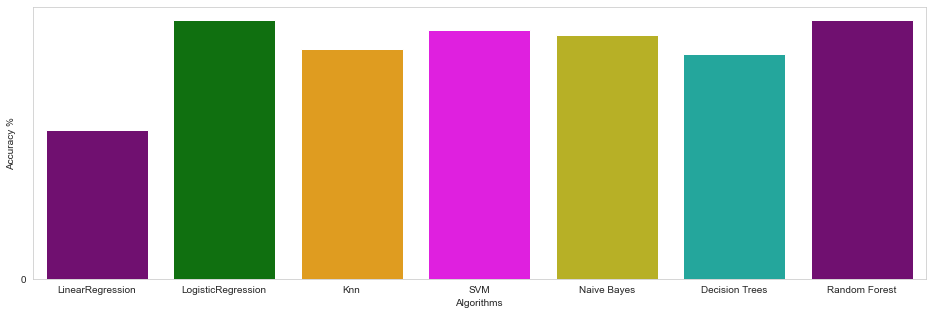

In [50]:
accuracies={}
accuracies["LinearRegression"]=lnr.score(X_test,y_test)
accuracies["LogisticRegression"]=lr.score(X_test,y_test)
accuracies["Knn"]=knn.score(X_test,y_test)
accuracies["SVM"]=svm0.score(X_test,y_test)
accuracies["Naive Bayes"]=nb.score(X_test,y_test)
accuracies["Decision Trees"]=dtc.score(X_test,y_test)
accuracies["Random Forest"]=rf.score(X_test,y_test)
print(accuracies)
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [58]:
# Predicted values
y_head_lnr = lnr.predict(X_test)
y_head_lr = lr.predict(X_test)
y_head_knn = knn.predict(X_test)
y_head_svm = svm0.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_rf = rf.predict(X_test)


#cm_lnr = confusion_matrix(y_test,y_head_lnr)
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


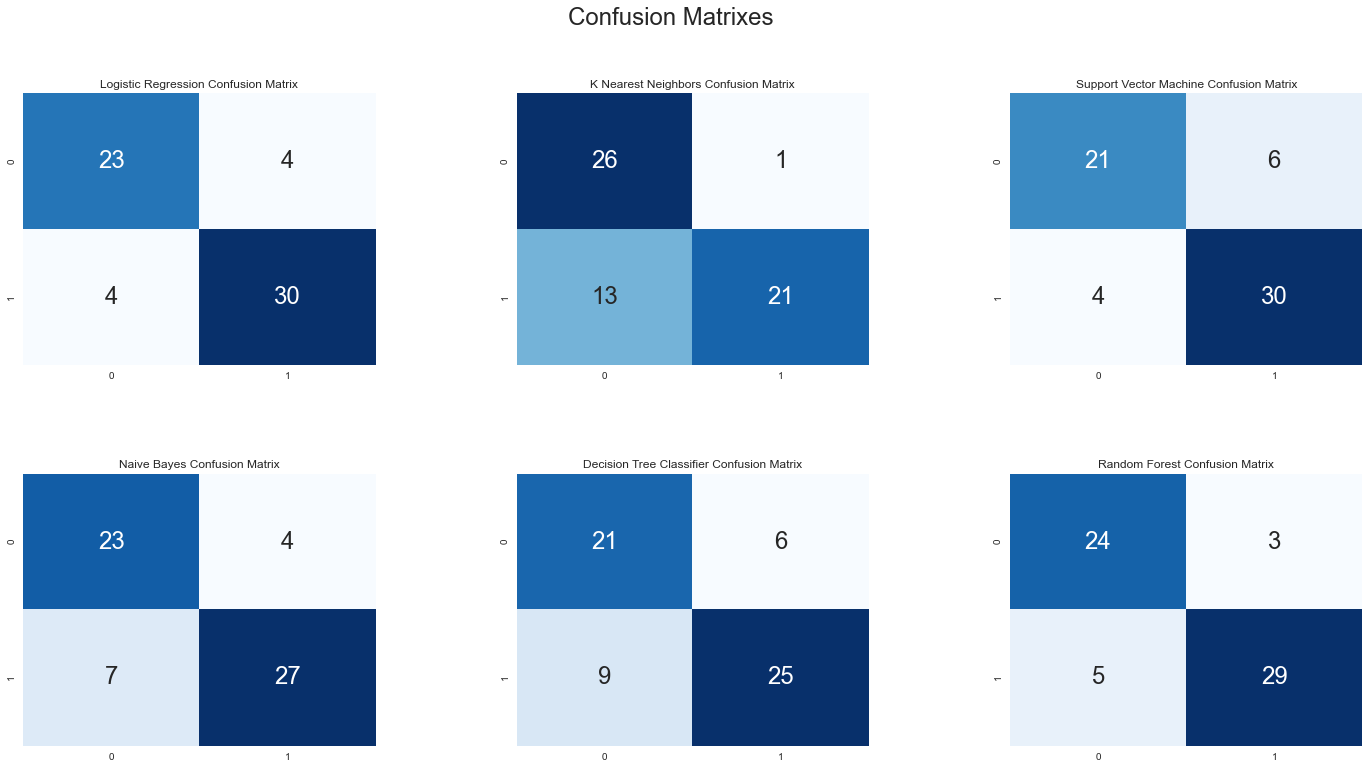

In [60]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()